# Лабораторная работа №2

ФИО: Дулян Арсен Артурович 
Группа: БИВТ-23-СП-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. импорт данных

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('/Users/lekzyrs/Desktop/ailabs/data/spotify-2023.csv', sep=',', encoding='latin-1')
print(f"Размер датасета: {data.shape}")
print(f"Колонки: {list(data.columns)}")

Размер датасета: (952, 24)
Колонки: ['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


## 2. Описание постановки задачи

**Постановка задачи:**

Датасет содержит информацию о популярных треках Spotify за 2023 год. Задача заключается в проведении разведочного анализа данных (EDA) для понимания структуры данных, выявления закономерностей и взаимосвязей между различными характеристиками треков и их популярностью.

**Переменные в датасете:**

1. **Категориальные переменные:**
   - `track_name` - название трека
   - `artist(s)_name` - имя исполнителя(ей)
   - `key` - тональность трека (A, B, C#, D, E, F, F#, G, G#, A#)
   - `mode` - лад (Major, Minor)

2. **Числовые переменные:**
   - `artist_count` - количество исполнителей
   - `released_year`, `released_month`, `released_day` - дата выпуска
   - `in_spotify_playlists`, `in_apple_playlists`, `in_deezer_playlists` - количество плейлистов в различных сервисах
   - `in_spotify_charts`, `in_apple_charts`, `in_deezer_charts`, `in_shazam_charts` - позиции в чартах
   - `bpm` - темп (удары в минуту)
   - `danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, `speechiness_%` - аудио-характеристики треков

3. **Целевая переменная:**
   - `streams` - количество прослушиваний трека

**Тип целевой переменной:**

Целевая переменная `streams` является **непрерывной** (continuous), так как количество стримов может принимать любое положительное значение от 0 до +∞. Это числовая переменная, которая может быть использована для регрессионного анализа.


## 3. Распределение целевой переменной

Размер датасета: (952, 24)
Колонки: ['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
Количество уникальных значений целевой переменной 'streams': 948
Общее количество наблюдений: 952

Основные статистики по целевой переменной:
count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


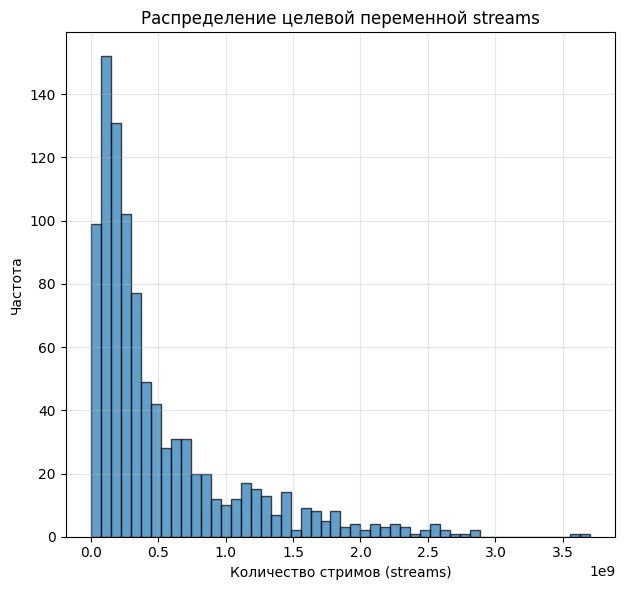


Минимальное значение: 2,762
Максимальное значение: 3,703,895,074
Медиана: 290,530,915
Среднее значение: 514,137,425


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('/Users/lekzyrs/Desktop/ailabs/data/spotify-2023.csv', sep=',', encoding='latin-1')
print(f"Размер датасета: {data.shape}")
print(f"Колонки: {list(data.columns)}")

# Анализ целевой переменной streams
target_var = 'streams'

# Проверка наличия колонки
if target_var in data.columns:
    # Преобразуем streams в числовой формат (на случай, если есть строки с запятыми)
    data[target_var] = data[target_var].astype(str).str.replace(',', '').astype(float)
    
    # Количество уникальных значений
    unique_count = data[target_var].nunique()
    print(f"Количество уникальных значений целевой переменной '{target_var}': {unique_count}")
    print(f"Общее количество наблюдений: {len(data)}")
    print(f"\nОсновные статистики по целевой переменной:")
    print(data[target_var].describe())
    
    # Построение гистограммы
    plt.figure(figsize=(12, 6))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    plt.hist(data[target_var], bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Количество стримов (streams)')
    plt.ylabel('Частота')
    plt.title('Распределение целевой переменной streams')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Дополнительный анализ
    print(f"\nМинимальное значение: {data[target_var].min():,.0f}")
    print(f"Максимальное значение: {data[target_var].max():,.0f}")
    print(f"Медиана: {data[target_var].median():,.0f}")
    print(f"Среднее значение: {data[target_var].mean():,.0f}")
else:
    print(f"Колонка '{target_var}' не найдена в датасете")


**Выводы по распределению целевой переменной:**

1. **Количество уникальных значений:** Большинство треков имеют уникальное количество стримов.

2. **Характер распределения:** 
   - Распределение `streams` является **правосторонне асимметричным** (положительная асимметрия)
   - Большинство треков имеют относительно небольшое количество стримов
   - Небольшое количество треков имеет очень большое количество стримов

3. **Дисбаланс данных:**
   - Наблюдается значительный дисбаланс: большинство наблюдений сосредоточено в области малых значений
   - Есть небольшое количество хитов с экстремально высоким количеством стримов




## 3. Основные статистики по переменным


In [10]:
# Вывод основных статистик по всем числовым переменным
# Метод describe() выводит count, mean, std, min, 25%, 50% (медиана), 75%, max

# Сначала преобразуем streams в числовой формат, если еще не сделано
if 'streams' in data.columns:
    data['streams'] = data['streams'].astype(str).str.replace(',', '').astype(float)

# Выбираем только числовые колонки для статистики
numeric_columns = data.select_dtypes(include=[np.number]).columns

print("Основные статистики по числовым переменным:")
print("=" * 80)
print(data[numeric_columns].describe())


Основные статистики по числовым переменным:
       artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.50

## 4. Основная информация по датасету


In [11]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    object 
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    object 
 14  bpm                   952 non-null    int64  
 15  key                   8

## 5. Количество пропусков в данных


In [12]:

missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

# Создаем DataFrame для удобного отображения
missing_df = pd.DataFrame({
    'Колонка': missing_values.index,
    'Количество пропусков': missing_values.values,
    'Процент пропусков': missing_percent.values
})

# Сортируем по количеству пропусков (от большего к меньшему)
missing_df = missing_df.sort_values('Количество пропусков', ascending=False)

print("Количество пропусков по колонкам:")
print("=" * 80)
print(missing_df.to_string(index=False))

# Показываем только колонки с пропусками
print("\n" + "=" * 80)
print("Колонки с пропусками:")
print("=" * 80)
missing_with_nulls = missing_df[missing_df['Количество пропусков'] > 0]
if len(missing_with_nulls) > 0:
    print(missing_with_nulls.to_string(index=False))
    print(f"\nВсего колонок с пропусками: {len(missing_with_nulls)}")
else:
    print("Пропусков не обнаружено!")

# Общая статистика
print(f"\nОбщее количество пропусков в датасете: {missing_values.sum()}")


Количество пропусков по колонкам:
             Колонка  Количество пропусков  Процент пропусков
                 key                    95           9.978992
    in_shazam_charts                    50           5.252101
          track_name                     0           0.000000
      artist(s)_name                     0           0.000000
          liveness_%                     0           0.000000
  instrumentalness_%                     0           0.000000
      acousticness_%                     0           0.000000
            energy_%                     0           0.000000
           valence_%                     0           0.000000
      danceability_%                     0           0.000000
                mode                     0           0.000000
                 bpm                     0           0.000000
    in_deezer_charts                     0           0.000000
 in_deezer_playlists                     0           0.000000
     in_apple_charts                

**Анализ пропусков и рекомендации по их замене:**

1. **Колонка `key`:**
   - **Причина пропусков:** Некоторые треки могут не иметь определенной тональности или данные не были извлечены из аудиофайла
   - **Способ замены:** 
     - Можно заменить на категорию "Unknown""

2. **Колонка `in_shazam_charts`:**
   - **Причина пропусков:** Трек может не попадать в чарты Shazam, либо данные не были собраны для этого сервиса
   - **Способ замены:**
     - Заменить на 0 (трек не в чартах)


## 6. Гистограммы признаков


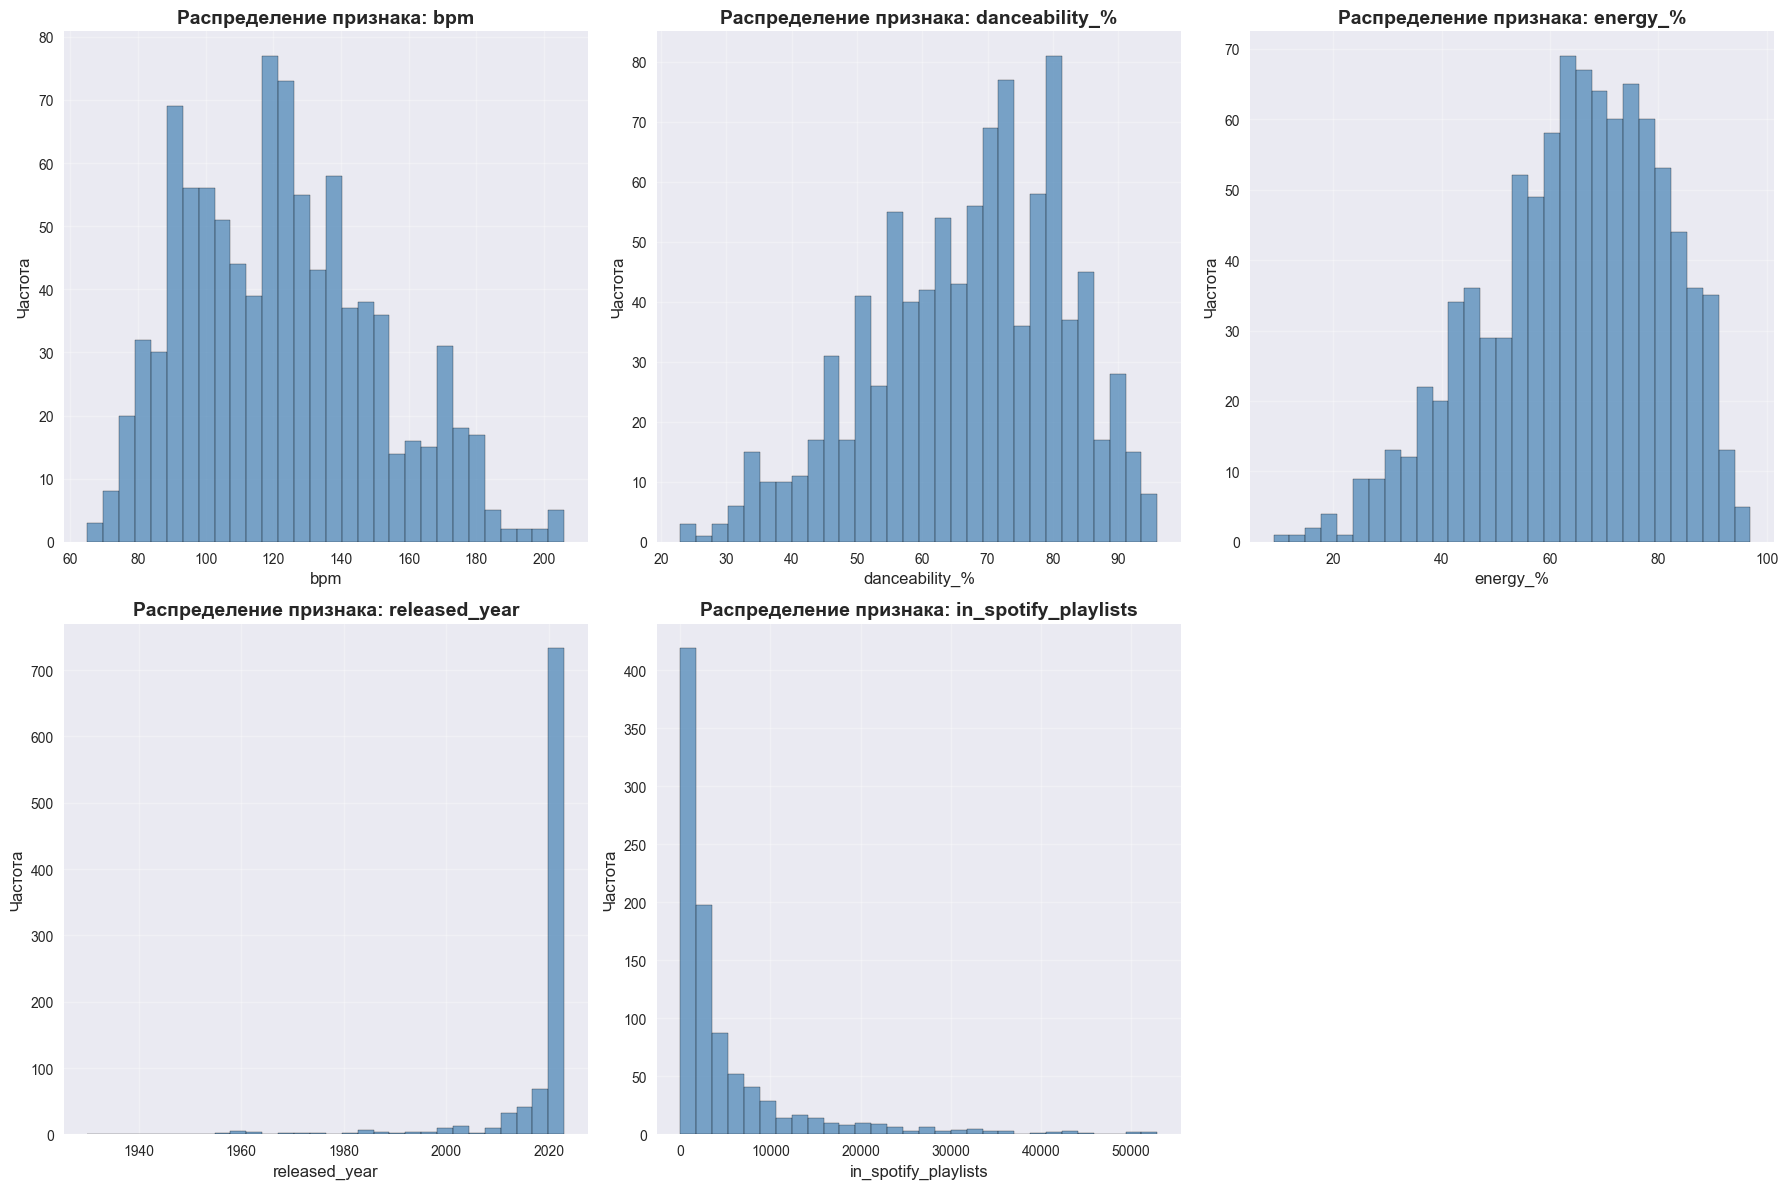

In [13]:
# Построение гистограмм для 5 признаков
# Выбираем интересные числовые признаки для анализа

features_to_plot = ['bpm', 'danceability_%', 'energy_%', 'released_year', 'in_spotify_playlists']

# Настройка стиля
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    if feature in data.columns:
        # Получаем данные для признака
        feature_data = data[feature].copy()
        
        # Если признак - строковый тип с запятыми, преобразуем в число
        if feature_data.dtype == 'object':
            feature_data = feature_data.astype(str).str.replace(',', '').astype(float)
        
        # Удаляем пропуски для построения гистограммы
        feature_data_clean = feature_data.dropna()
        
        # Построение гистограммы
        axes[i].hist(feature_data_clean, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Частота', fontsize=12)
        axes[i].set_title(f'Распределение признака: {feature}', fontsize=14, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
    else:
        axes[i].text(0.5, 0.5, f'Признак {feature} не найден', 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'Ошибка: {feature}', fontsize=14)

# Удаляем лишний subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()




**Анализ распределений признаков:**


3. **`released_year` (год выпуска):**
   - **Характер распределения:** **Сильно правосторонне смещенное распределение** (положительная асимметрия)
   - **Симметричность:** **Несимметричное** - большинство треков выпущены в последние годы (2020-2023)
   - **Особенности:** 
     - Это объясняется тем, что датасет содержит популярные треки 2023 года, многие из которых были выпущены недавно

4. **`in_spotify_playlists` (количество плейлистов в Spotify):**
   - **Характер распределения:** **Сильно правосторонне смещенное распределение** (положительная асимметрия)
   - **Симметричность:** **Несимметричное** - большинство треков имеют относительно небольшое количество плейлистов
   - **Выводы:** Распределение показывает значительный дисбаланс - большинство треков имеют умеренную популярность, а небольшое количество являются хитами



## 7. Графики зависимости переменных от целевой переменной


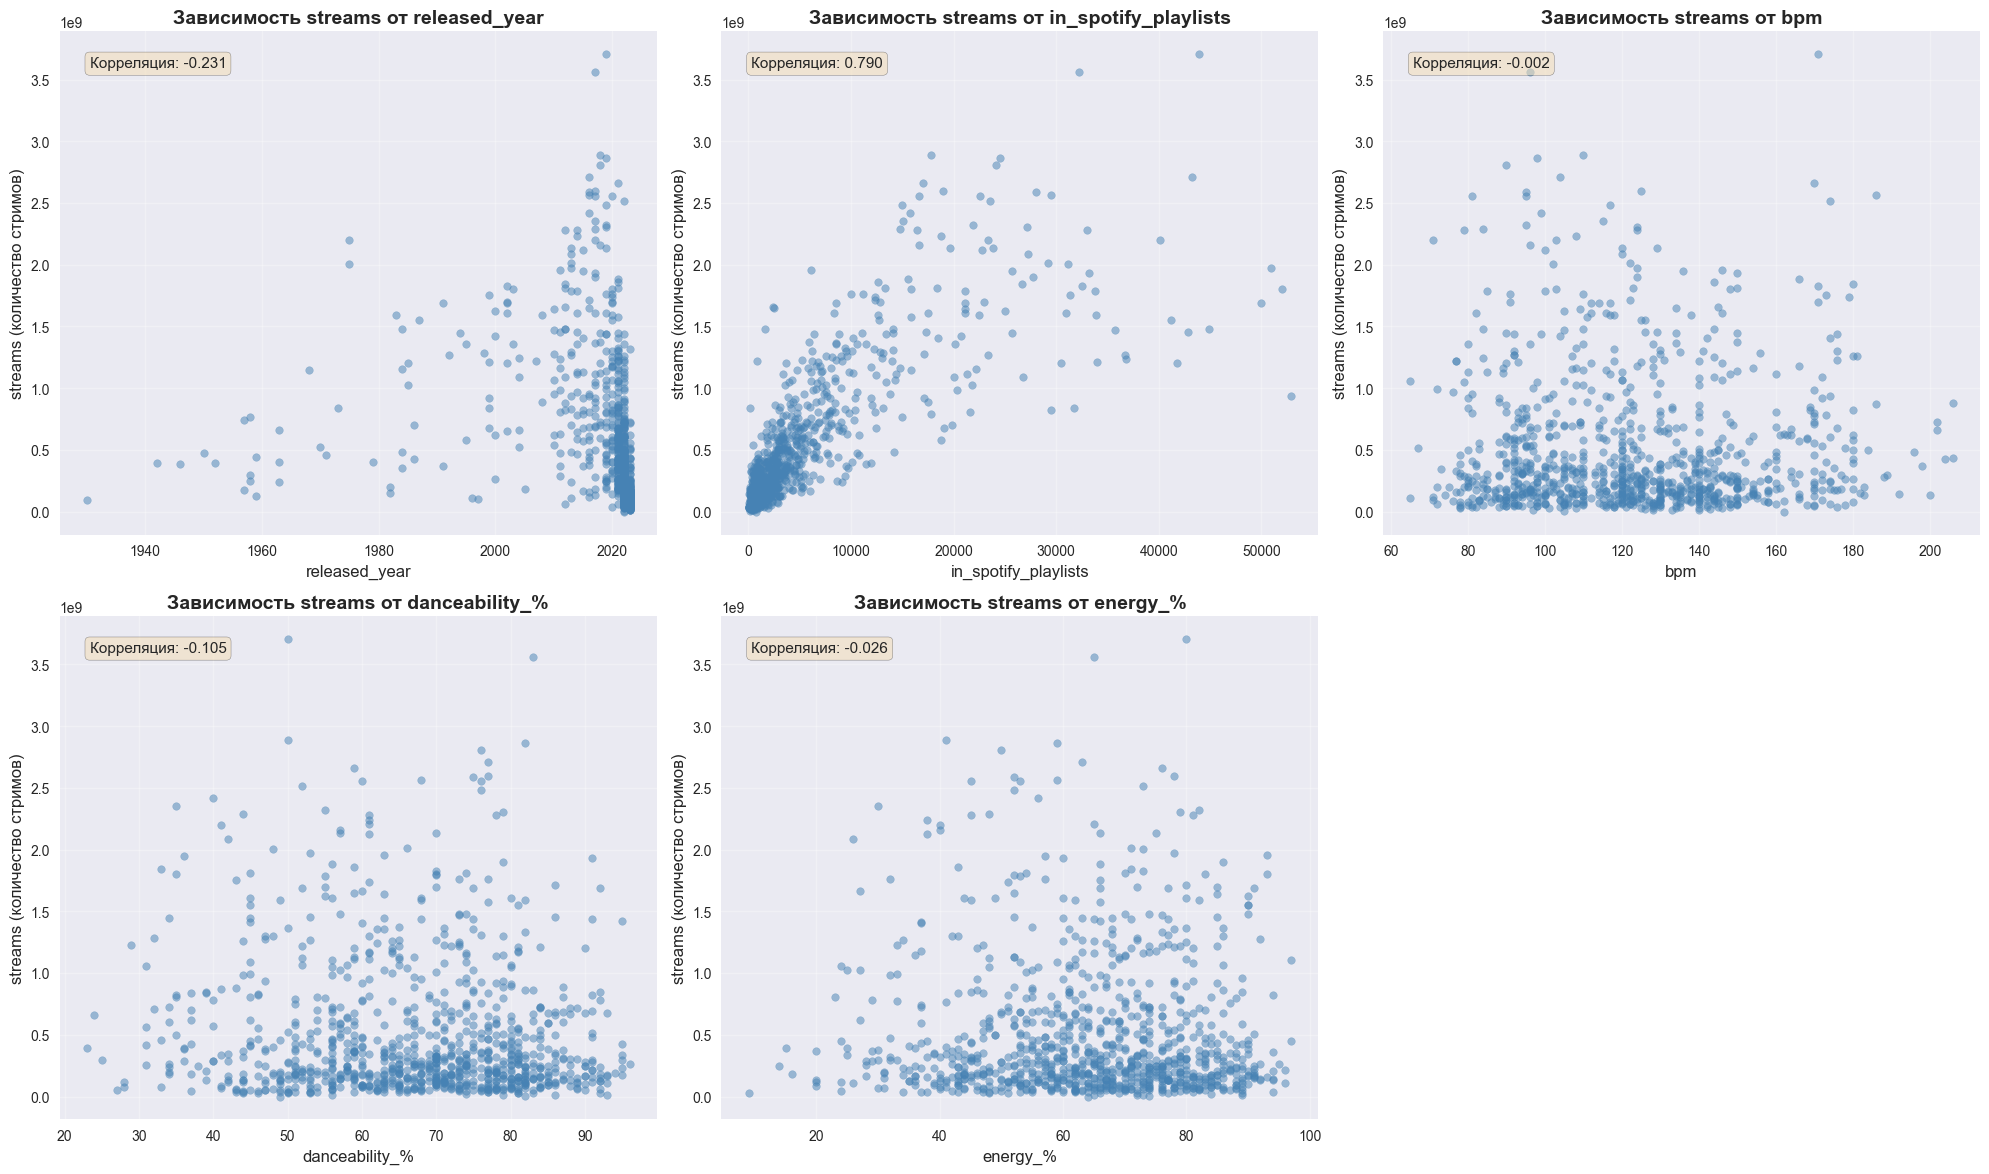

In [14]:
features_to_analyze = ['released_year', 'in_spotify_playlists', 'bpm', 'danceability_%', 'energy_%']

# Убеждаемся, что streams в числовом формате
if 'streams' in data.columns:
    data['streams'] = data['streams'].astype(str).str.replace(',', '').astype(float)

# Настройка стиля
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_analyze):
    if feature in data.columns:
        # Получаем данные
        feature_data = data[feature].copy()
        streams_data = data['streams'].copy()
        
        # Если признак - строковый тип с запятыми, преобразуем в число
        if feature_data.dtype == 'object':
            feature_data = feature_data.astype(str).str.replace(',', '').astype(float)
        
        # Удаляем пропуски
        mask = ~(feature_data.isna() | streams_data.isna())
        feature_clean = feature_data[mask]
        streams_clean = streams_data[mask]
        
        # Построение scatter plot
        axes[i].scatter(feature_clean, streams_clean, alpha=0.5, s=30, color='steelblue')
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('streams (количество стримов)', fontsize=12)
        axes[i].set_title(f'Зависимость streams от {feature}', fontsize=14, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        
        # Вычисляем коэффициент корреляции
        correlation = feature_clean.corr(streams_clean)
        axes[i].text(0.05, 0.95, f'Корреляция: {correlation:.3f}', 
                    transform=axes[i].transAxes, fontsize=11,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        axes[i].text(0.5, 0.5, f'Признак {feature} не найден', 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'Ошибка: {feature}', fontsize=14)

# Удаляем лишний subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


**Выводы о взаимосвязи переменных с целевой переменной streams:**

1. **`released_year` (год выпуска):**
   - **Вывод:** Год выпуска не является хорошим предиктором для количества стримов. Хотя большинство треков в датасете свежие (2020-2023), это не означает прямую зависимость популярности от года выпуска.
   - **Использование для прогнозирования:** Не рекомендуется как основной признак

2. **`in_spotify_playlists` (количество плейлистов в Spotify):**
   - **Вывод:** Чем больше трек присутствует в плейлистах Spotify, тем больше у него стримов. Это логично, так как попадание в плейлисты увеличивает видимость трека.
   - **Использование для прогнозирования:** можно использовать для прогнозирования

3. **`bpm` (удары в минуту):**
   - **Вывод:** Темп трека не показывает значимой связи с количеством стримов. Популярность не зависит от темпа музыки.
   - **Использование для прогнозирования:** Не рекомендуется как основной признак

4. **`danceability_%` (танцевальность):**
   - **Вывод:** танцевальность трека не показывает значимой связи с количеством стримов. Популярность не зависит напрямую от танцевальность.
   - **Использование для прогнозирования:** Не рекомендуется как основной признак

5. **`energy_%` (энергетичность):**
   - **Вывод:** Энергетичность трека не показывает значимой связи с количеством стримов. Популярность не зависит напрямую от энергетичности.
   - **Использование для прогнозирования:** Не рекомендуется как основной признак
